In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv(r"C:\Users\gsanj\Downloads\public_dataset_updated.tar[1]\public_dataset\train\price_data\Feautures\AGI_merged.csv", parse_dates=['datetime'])

# Assuming the dataset has already been loaded as 'data'
# Ensure the data is sorted by datetime to avoid any crossing of data points
data_sorted = data.sort_values(by='datetime')

# Define features and target
features = data_sorted[['MA_14_open', 'MA_14_close', 'price_diff_close_open', 'volume_ratio', 'normalized_score']]
target = data_sorted['close_x']

# Split the data into 80% training and 20% validation, maintaining the chronological order
train_size = int(0.8 * len(data_sorted))
X_train, X_val = features.iloc[:train_size], features.iloc[train_size:]
y_train, y_val = target.iloc[:train_size], target.iloc[train_size:]

# Check the split sizes
print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")

Training set size: 388
Validation set size: 98


In [26]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Create a polynomial regression model
degree = 2  # You can adjust the degree as per your needs
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fit the model on the training data
poly_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = poly_model.predict(X_val)

# Model summary
print(f"Model coefficients: {poly_model.named_steps['linearregression'].coef_}")
print(f"Model intercept: {poly_model.named_steps['linearregression'].intercept_}")


Model coefficients: [ 0.00000000e+00 -3.52565938e+00  3.80221731e+00  9.25534800e-02
  7.40825834e-01  9.13459993e-03  2.04735196e+01 -1.09353643e+01
 -6.60149729e+01 -2.57667530e+01  2.24153233e+01 -1.42657331e+01
  7.93991032e+01  3.41898445e+01 -2.24662253e+01  9.88096923e+00
 -1.14343786e+01  8.16225933e-01 -3.56100238e+00 -4.52531537e-01
  1.57817064e-02]
Model intercept: -0.0004678893169635795


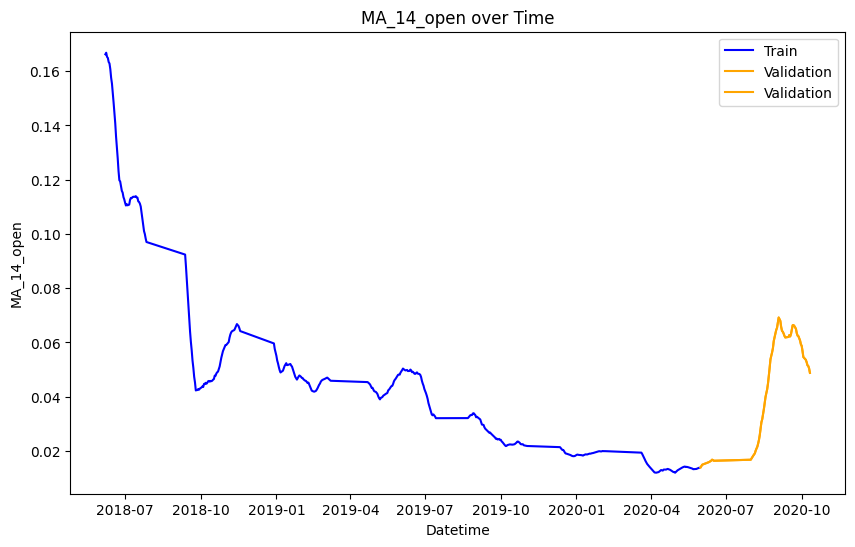

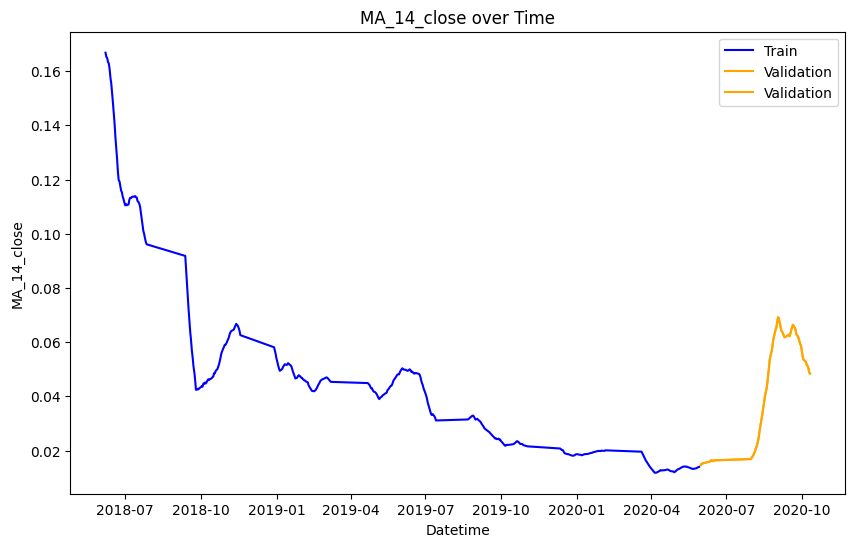

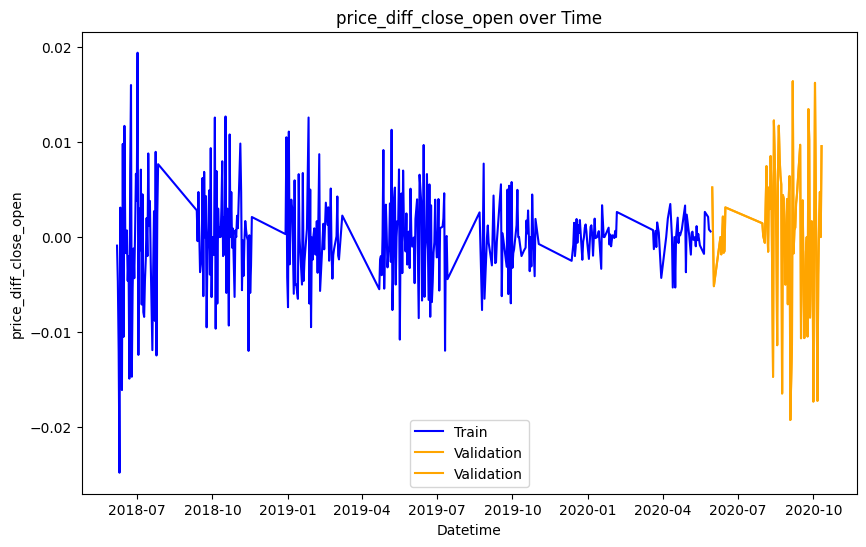

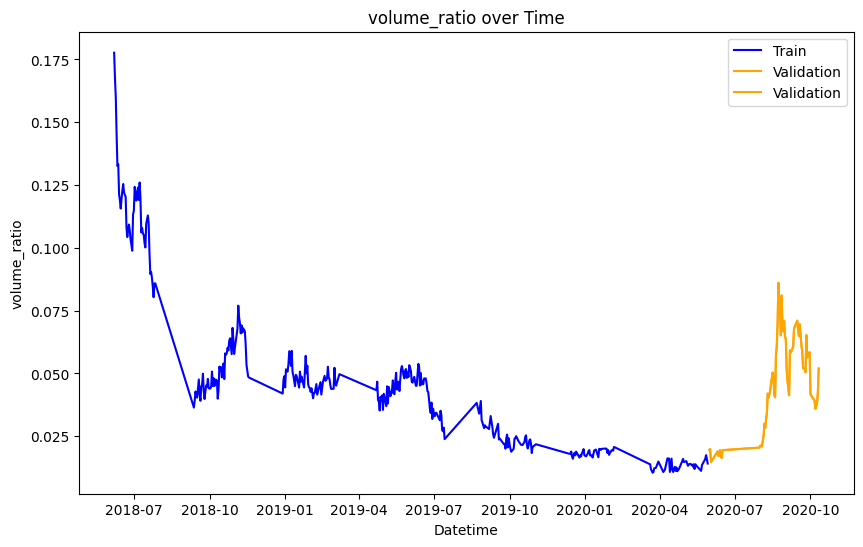

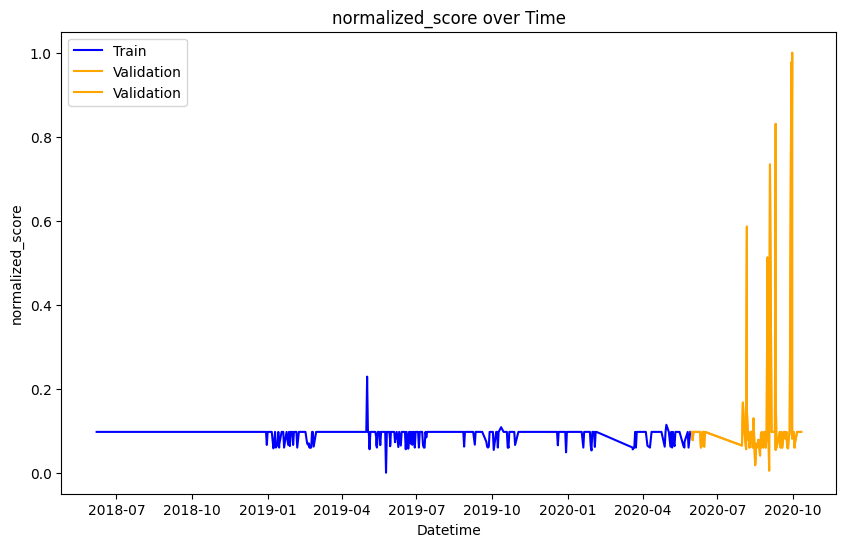

In [27]:
import matplotlib.pyplot as plt

# Plot each feature against datetime for both training and validation sets
for col in features.columns:
    plt.figure(figsize=(10, 6))
    plt.plot(data_sorted['datetime'][:train_size], X_train[col], label='Train', color='blue')
    plt.plot(data_sorted['datetime'][train_size:], X_val[col], label='Validation', color='orange')
    plt.plot(data_sorted['datetime'][train_size:], X_val[col], label='Validation', color='orange')
    plt.title(f'{col} over Time')
    plt.xlabel('Datetime')
    plt.ylabel(col)
    plt.legend()
    plt.show()


In [28]:
print("First few actual close_x values:", y_val.head().values)
print("First few predicted close_x values:", y_pred[:5])

First few actual close_x values: [0.01987 0.01987 0.0147  0.019   0.01718]
First few predicted close_x values: [0.02048078 0.0197952  0.01445359 0.01825101 0.01638151]


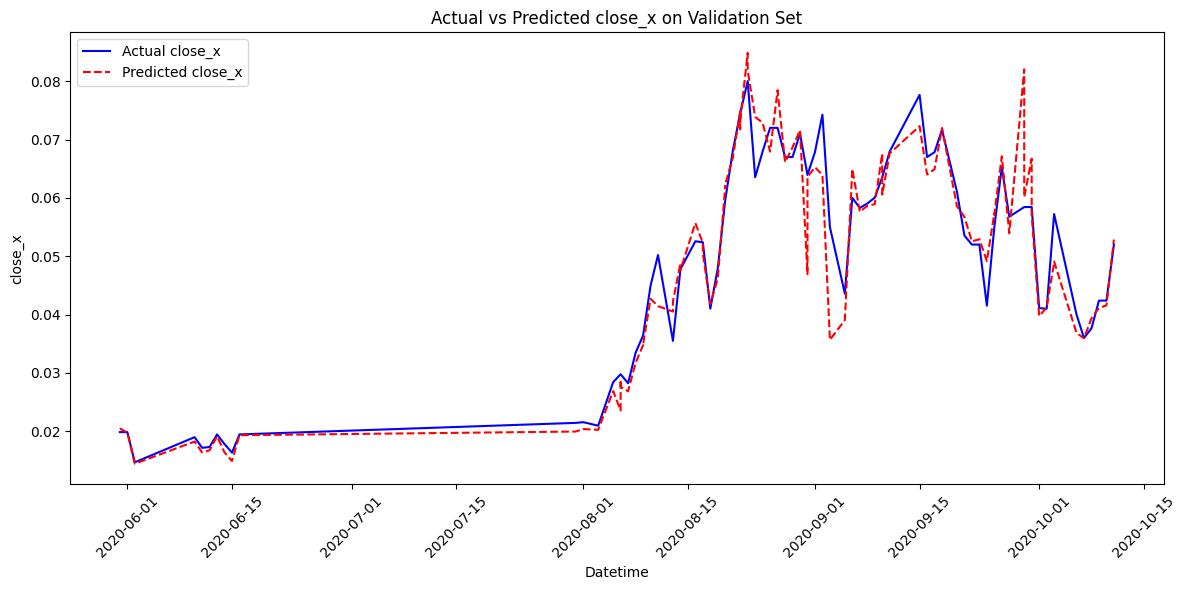

In [29]:
# Importing necessary libraries for plotting
import matplotlib.pyplot as plt

# Plot actual vs predicted close_x for the validation set
plt.figure(figsize=(12, 6))
plt.plot(data_sorted['datetime'][train_size:], y_val, label='Actual close_x', color='blue')
plt.plot(data_sorted['datetime'][train_size:], y_pred, label='Predicted close_x', color='red', linestyle='--')

plt.title('Actual vs Predicted close_x on Validation Set')
plt.xlabel('Datetime')
plt.ylabel('close_x')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [30]:
X_train

,MA_14_open,MA_14_close,price_diff_close_open,volume_ratio,normalized_score
0,0.166243,0.166814,-0.00090,0.177658,0.097203
1,0.166814,0.165293,-0.00470,0.167606,0.097203
2,0.165293,0.164893,-0.01200,0.159787,0.097203
3,0.164893,0.163400,-0.02480,0.144938,0.097203
4,0.163400,0.162850,0.00310,0.132577,0.097203
...,...,...,...,...,...
383,0.013247,0.013240,0.00265,0.013513,0.059869
384,0.013247,0.013240,0.00265,0.013513,0.073010
385,0.013350,0.013502,0.00212,0.015944,0.097203
386,0.013502,0.013735,0.00080,0.017482,0.059869


Mean Squared Error: 2.3514747834349166e-05
R² Score: 0.9281365342707857


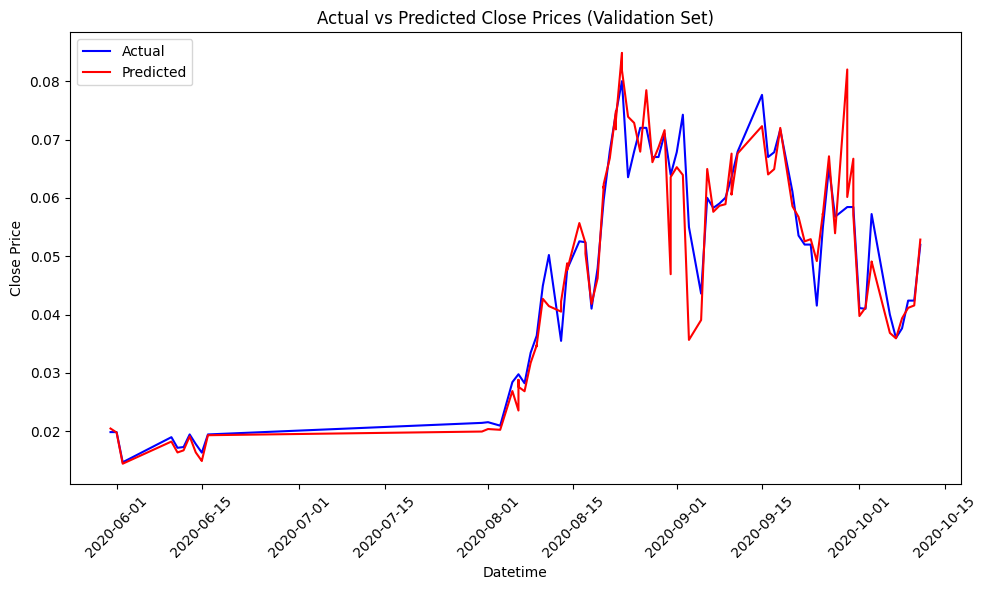

Confusion Matrix:
 [[15  0  0  0  0  0  0  0  0  0]
 [ 0  5  0  0  0  0  0  0  0  0]
 [ 0  0  5  3  0  0  0  0  0  0]
 [ 0  0  1  7  1  0  0  0  0  0]
 [ 0  0  0  1  9  2  0  0  0  0]
 [ 0  0  1  0  2 11  5  0  1  0]
 [ 0  0  0  0  1  3 12  2  0  0]
 [ 0  0  0  0  0  0  2  5  1  0]
 [ 0  0  0  0  0  0  0  1  1  1]
 [ 0  0  0  0  0  0  0  0  0  0]]


In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset (replace with actual file path)
data = pd.read_csv(r"C:\Users\gsanj\Downloads\public_dataset_updated.tar[1]\public_dataset\train\price_data\Feautures\AGI_merged.csv", parse_dates=['datetime'])

# Sort the data by 'datetime' to avoid crossing plots
data = data.sort_values(by='datetime')

# Select the features and target for the model
features = data[['MA_14_open', 'MA_14_close', 'price_diff_close_open', 'volume_ratio', 'normalized_score']]
target = data['close_x']

# Split the data into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(features, target, test_size=0.2, shuffle=False)

# Create polynomial features (degree 2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)

# Train the polynomial regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions on the validation set
y_val_pred = model.predict(X_val_poly)

# Calculate accuracy metrics: Mean Squared Error and R² Score
mse = mean_squared_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

# Output the accuracy metrics
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

# Plot actual vs predicted values, using 'datetime' as the x-axis
plt.figure(figsize=(10, 6))
plt.plot(data['datetime'].iloc[-len(y_val):], y_val, label="Actual", color='blue')
plt.plot(data['datetime'].iloc[-len(y_val):], y_val_pred, label="Predicted", color='red')
plt.xlabel('Datetime')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Prices (Validation Set)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Confusion matrix for regression (not typical but a binning-based approach can be used)
from sklearn.metrics import confusion_matrix
import numpy as np

# Create bins to convert regression outputs to classification-like labels
bins = np.linspace(min(y_val.min(), y_val_pred.min()), max(y_val.max(), y_val_pred.max()), 10)
y_val_binned = np.digitize(y_val, bins)
y_val_pred_binned = np.digitize(y_val_pred, bins)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_val_binned, y_val_pred_binned)
print("Confusion Matrix:\n", conf_matrix)


In [34]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
accuracy = accuracy_score(y_val, y_val_pred)
print(f'Accuracy: {accuracy:.2f}')

ValueError: continuous is not supported